In [1]:
# Load CSV Using Python Standard Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [2]:
filename_train = 'train.csv'
filename_test = 'test.csv'
raw_data = pd.read_csv(filename_train)
test_data = pd.read_csv(filename_test)

In [3]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_data = raw_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
print(raw_data.shape)

(891, 9)


In [5]:
Submission_df = pd.DataFrame() #creates a new dataframe that's empty
Submission_df['PassengerId'] = test_data['PassengerId']

In [6]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
print(test_data.shape)

(418, 8)


In [7]:
types = raw_data.dtypes
print(types)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [8]:
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
raw_data.isnull().sum(axis=0)/raw_data.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [10]:
test_data.isnull().sum(axis=0)/test_data.shape[0] * 100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64

In [11]:
raw_data = raw_data.fillna({"Embarked": "S"})

In [12]:
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(raw_data["Embarked"])
emb_class = pd.DataFrame(lb_results, columns=lb_style.classes_)
emb_class
raw_data = pd.concat([raw_data, emb_class], sort=False, axis = 1)
raw_data = raw_data.drop(['Embarked'], axis = 1)

In [13]:
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(test_data["Embarked"])
emb_class = pd.DataFrame(lb_results, columns=lb_style.classes_)
emb_class
test_data = pd.concat([test_data, emb_class], sort=False, axis = 1)
test_data = test_data.drop(['Embarked'], axis = 1)

In [14]:
raw_data["Sex"] = raw_data["Sex"].map({'female': 0, 'male': 1})

In [15]:
test_data["Sex"] = test_data["Sex"].map({'female': 0, 'male': 1})

In [16]:
raw_data['Age'].fillna(raw_data["Age"].median(), inplace=True)
test_data['Fare'].fillna(test_data["Fare"].median(), inplace=True)

In [17]:
test_data['Age'].fillna(test_data["Age"].median(), inplace=True)

In [18]:
raw_data.isnull().sum(axis=0)/raw_data.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
C            0.000000
Q            0.000000
S            0.000000
dtype: float64

In [19]:
test_data.isnull().sum(axis=0)/test_data.shape[0] * 100

Pclass     0.000000
Sex        0.000000
Age        0.000000
SibSp      0.000000
Parch      0.000000
Fare       0.000000
Cabin     78.229665
C          0.000000
Q          0.000000
S          0.000000
dtype: float64

In [20]:
raw_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [21]:
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
correlations = raw_data.corr(method='pearson')
print(correlations)


          Survived  Pclass   Sex       Age  SibSp  Parch  Fare     C         Q         S
Survived  1.00e+00   -0.34 -0.54 -6.49e-02  -0.04   0.08  0.26  0.17  3.65e-03 -1.50e-01
Pclass   -3.38e-01    1.00  0.13 -3.40e-01   0.08   0.02 -0.55 -0.24  2.21e-01  7.41e-02
Sex      -5.43e-01    0.13  1.00  8.12e-02  -0.11  -0.25 -0.18 -0.08 -7.41e-02  1.19e-01
Age      -6.49e-02   -0.34  0.08  1.00e+00  -0.23  -0.17  0.10  0.03 -3.14e-02 -6.73e-03
SibSp    -3.53e-02    0.08 -0.11 -2.33e-01   1.00   0.41  0.16 -0.06 -2.64e-02  6.87e-02
Parch     8.16e-02    0.02 -0.25 -1.72e-01   0.41   1.00  0.22 -0.01 -8.12e-02  6.08e-02
Fare      2.57e-01   -0.55 -0.18  9.67e-02   0.16   0.22  1.00  0.27 -1.17e-01 -1.62e-01
C         1.68e-01   -0.24 -0.08  3.02e-02  -0.06  -0.01  0.27  1.00 -1.48e-01 -7.83e-01
Q         3.65e-03    0.22 -0.07 -3.14e-02  -0.03  -0.08 -0.12 -0.15  1.00e+00 -4.99e-01
S        -1.50e-01    0.07  0.12 -6.73e-03   0.07   0.06 -0.16 -0.78 -4.99e-01  1.00e+00


In [22]:
raw_data.skew()

Survived    0.48
Pclass     -0.63
Sex        -0.62
Age         0.51
SibSp       3.70
Parch       2.75
Fare        4.79
C           1.60
Q           2.95
S          -1.01
dtype: float64

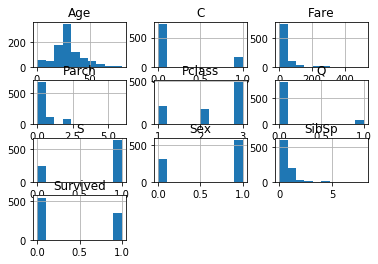

In [23]:
raw_data.hist()
pyplot.show()

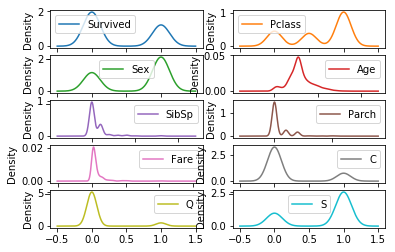

In [24]:
raw_data.plot(kind='density', subplots=True, layout=(5,2), sharex=False)
pyplot.show()

In [25]:
raw_data.fillna(0, inplace = True)
test_data.fillna(0, inplace = True)

In [26]:
raw_data[raw_data['Cabin'] != 0] = 1
test_data[test_data['Cabin'] != 0] = 1

In [27]:
array = raw_data.values
# separate array into input and output components
X = array[:,1:]
Y = array[:,0]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
print(normalizedX[0:5,:])


[[0.12808793 0.04269598 0.93931146 0.04269598 0.         0.30954582
  0.         0.         0.         0.04269598]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.31622777 0.31622777 0.31622777]
 [0.10963184 0.         0.95014262 0.         0.         0.28961078
  0.         0.         0.         0.03654395]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.31622777 0.31622777 0.31622777]
 [0.08317936 0.02772645 0.97042586 0.         0.         0.22319795
  0.         0.         0.         0.02772645]]


In [28]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)


[0.14854808 0.1749759  0.16976577 0.02869972 0.03398835 0.17813689
 0.14366867 0.06727467 0.04360786 0.0113341 ]


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
#Logistic Regression

test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: " + str(result*100.0))

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)


Accuracy: 81.71641791044776
[[122  18]
 [ 31  97]]


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8631335830212234


In [31]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.849625 (0.026084)
LDA: 0.847378 (0.034073)
KNN: 0.783471 (0.049528)
CART: 0.841798 (0.035420)
NB: 0.776754 (0.047927)


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid t

SVM: 0.791361 (0.045867)


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


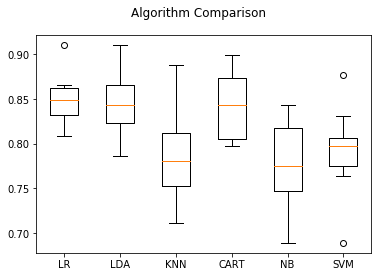

In [32]:
    # boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [33]:
model = models[0][1]
model.fit(X, Y)


C:\Users\achanne\AppData\Local\Continuum\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
predicted = pd.DataFrame({'Survived' : model.predict(test_data)})
predicted.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [35]:
Submission_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [36]:
Submission_df = pd.concat([Submission_df, predicted], names=['PassengerID', 'Survived'], sort=False, axis = 1, ignore_index=False)

In [37]:
Submission_df.to_csv("gender_submission.csv", index = False)

In [38]:
Submission_df.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [ ]:
raw_data.head()


In [ ]:
test_data.head()